### 【 타이타닉 분석 및 시각화 】
- 데이터 :  titanic_train.csv
- (1) 생존자의 연령
- (2) 생존자의 성별
- (3) 생존자들의 연령과 성별 분석
- (4) 등석에 따른 생존자 분석

[1] 모듈 준비 및 데이터 로딩<hr>

In [48]:
## 모듈 로딩
import pandas as pd 
import matplotlib.pyplot as plt 
import koreanize_matplotlib

In [49]:
## 데이터 준비
#DATA_FILE = '../Data/titanic.csv'
DATA_FILE = '../Data/titanic_train.csv'

## 데이터 로딩
dataDF = pd.read_csv(DATA_FILE)

## 본사본 준비
dataDF2 = dataDF.copy()

[2] 기본 데이터 확인 및 전처리 방향 설정 <hr>

In [50]:
## -------------------------------------------------------------
## [2-1] 기본 데이터 확인 : head() / info() / describe()
## -------------------------------------------------------------
## 실제 데이터
display( dataDF2.head(3) )

## 데이터프레임 전반적인 정보 : 행/샘플 수, 컬럼수, 컬럼별 결측치, 컬럼별 타입
dataDF2.info()

## 컬럼별 상세 => 데이터 분포 및 의미기반 타입 
numDF = dataDF2.describe()
objDF = dataDF2.describe(exclude=['number'])    ## exclude = [타입명] : 해당 타입 제외한 나머지 타입

display("수치형 컬럼들",   numDF)
display("텍스트형 컬럼들", objDF)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


'수치형 컬럼들'

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


'텍스트형 컬럼들'

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [51]:
## -------------------------------------------------------------
## [2-2] 전처리 방향 설정
## -------------------------------------------------------------
## -> 결측치 처리 컬럼
##      Age                     --> ① 일부 버림/대량 추가 수집  ② 대체 여부

## -> 자료형 변환 컬럼
##      Sex         object      --> category
##      Survived    int64       --> category
##      Pclass      int64       --> category
##      Embarked    object      --> category  X
##      SibSp/Parch int64       --> 고유값 체크 필요함 
##      Cabin       object      --> category  X

## -> 불필요한 컬럼 : 삭제 
## -> 유사/동일한 데이터 컬럼, 대부분의 데이터가 결측치인 컬럼, 분석 주제/목적에 맞지 않는 컬럼
##      PassengerId, Name, Cabin, Embarked


[3] 전처리 진행 <hr>

In [52]:
## -------------------------------------------------------------
## [3-1] 불필요한 컬럼 : 삭제  drop() : 삭제 방향(기:행)
##       => PassengerId, Name, Cabin, Embarked
## -------------------------------------------------------------
del_col=['PassengerId', 'Name', 'Cabin', 'Embarked']

dataDF2.drop( labels=del_col , axis='columns')   ## axis = 1
dataDF2.drop( columns=del_col , inplace=True ) 

print(f'불필요 컬럼 정리 후 \n { dataDF2.columns }')

불필요 컬럼 정리 후 
 Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare'], dtype='object')


In [53]:
## -------------------------------------------------------------
## [3-2] 컬럼별 자료형 변환 : astype( 타입명 ) inplace X 재저장 필수!
##       -기준:연산가능여부-> 수치형/범주형
##       -목적:분석목적/주제/시각화 단계에서 수치형 => 범주형
## -------------------------------------------------------------
## => SibSp/Parch int64       --> 고유값 체크 필요함 : 기존 타입 유지
##    1인/2인가구/4인구...                     => 범주형
##    평균 형제자매수는 3.4,  평균 가족구성수 3.1 => 수치형
print( 'SibSp', dataDF2['SibSp'].unique().tolist(),  dataDF2['SibSp'].nunique() )
print( 'Parch', dataDF2['Parch'].unique().tolist(),  dataDF2['Parch'].nunique() )

## => 'Survived', 'Pclass', 'Sex' => 범주형 category로 변환
for colname in ['Survived', 'Pclass', 'Sex']:
    dataDF2[colname] = dataDF2[colname].astype('category')

## => 변환 결과 확인
print(f'dataDF2 dtypes---\n{dataDF2.dtypes.to_list() }')


SibSp [1, 0, 3, 4, 2, 5, 8] 7
Parch [0, 1, 2, 5, 3, 4, 6] 7
dataDF2 dtypes---
[CategoricalDtype(categories=[0, 1], ordered=False, categories_dtype=int64), CategoricalDtype(categories=[1, 2, 3], ordered=False, categories_dtype=int64), CategoricalDtype(categories=['female', 'male'], ordered=False, categories_dtype=object), dtype('float64'), dtype('int64'), dtype('int64'), dtype('O'), dtype('float64')]


In [54]:
## -------------------------------------------------------------------------------------
## [3-3] 결측치(Missing Value) : 빈 칸/ 데이터 없는 것
## - 표기법 : NaN, NaT, NA, None, null
## - 결측치 조사 => isna()/isnull() : True/False    notna()/notnull() : True/False 정상데이터여부
## - 결측치 처리 => [삭제] dropna()   [대체] fillna() / ffill() / bfill()
## -------------------------------------------------------------------------------------
## - 가장 좋은 방법 : 다시 수집 => 시간/비용
## - 일부/미미한 수 : 삭제
## - 대체 : 같은 행의 다른 컬럼들과 비슷한 행들의 값과 비교해서 채우기 : 비슷한 데이터에서 추출 
##         같은 컬럼의 값들의 패턴/흐름 비슷하다면 이전/이후값으로 채우기 
##         결측치를 위한 타입 (예:기타, 응답없음, 생각해본적없음, 미상,알수없음) 즉 생성
## -------------------------------------------------------------------------------------
## => 결측치 조사 
naSR = dataDF2.isna().sum()

## => 결측치 처리 방법 [1] 삭제 : 행 단위로 1개의 컬럼이라도 NaN이면 삭제
dataDF2.dropna()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
0,0,3,male,22.0,1,0,A/5 21171,7.2500
1,1,1,female,38.0,1,0,PC 17599,71.2833
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250
3,1,1,female,35.0,1,0,113803,53.1000
4,0,3,male,35.0,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,382652,29.1250
886,0,2,male,27.0,0,0,211536,13.0000
887,1,1,female,19.0,0,0,112053,30.0000
889,1,1,male,26.0,0,0,111369,30.0000


In [55]:
## ----------------------------------------------------------------------------------
## => 결측치 처리 방법 [2] 대체 : 전체 데이터의 5%이상 시 삭제 X. 
## ----------------------------------------------------------------------------------
## => 컬럼의 값들 관련성 O : 이전/이후값으로 대체, 여러개 값으로 대체 
## => 컬럼의 값들 관련성 X : 결측치가 존재하는 행과 유사한 행들, 관련있는 컬럼들을 기반으로 대체 
## [2-1] 성별에 따른 나이 평균값
display( '[성별에 따른 나이 평균값]', 
          dataDF2[['Sex', 'Age']].groupby(by='Sex', observed=True).mean() )

## [2-2] 등석에 따른 나이 평균값
display( '[등석에 따른 나이 평균값]', 
          dataDF2[['Pclass', 'Age']].groupby(by='Pclass', observed=True).mean() )


## [2-3] 등석과 성별에 따른 나이 중앙값
display( '[등석과 성별에 따른 나이 중앙값]', 
          dataDF2[['Pclass', 'Sex', 'Age']].groupby(by=['Pclass', 'Sex'], observed=True).median(numeric_only=True) )


'[성별에 따른 나이 평균값]'

,Age
Sex,
female,27.915709
male,30.726645


'[등석에 따른 나이 평균값]'

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


'[등석과 성별에 따른 나이 중앙값]'

Age
Pclass Sex         
1      female  35.0
       male    40.0
2      female  28.0
       male    30.0
3      female  21.5
       male    25.0

In [56]:
## ==> 등석과 성별을 기반으로 age 컬럼의 결측치 대체
## ==> 방법1) Groupby 후 loop문 활용
valueDF = dataDF2[['Pclass', 'Sex', 'Age']].groupby(by=['Pclass', 'Sex'], observed=True).median(numeric_only=True)


for k, v in valueDF.to_dict()['Age'].items():
    mask = (dataDF2.Pclass==k[0]) &(dataDF2.Sex==k[1])
    dataDF2.loc[mask, 'Age2'] = dataDF2.loc[mask, 'Age'].fillna(v)


print(dataDF2.isna().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Age2          0
dtype: int64


In [58]:
## ==> 방법2) Groupby의 transform()메서드 활용

# 그룹별 중앙값 대체 (Pclass, Sex 기준)
dataDF2['Age_imputed'] = dataDF2[['Pclass', 'Sex', 'Age']].groupby(by=['Pclass', 'Sex'], observed=True).transform(lambda x: x.fillna(x.median()))
resulT = dataDF2.groupby(['Pclass', 'Sex'], observed=False)['Age'].transform(lambda x: x.fillna(x.median()))

# 대체 결과 확인
print(dataDF2.isna().sum())


Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Age2             0
Age_imputed      0
dtype: int64


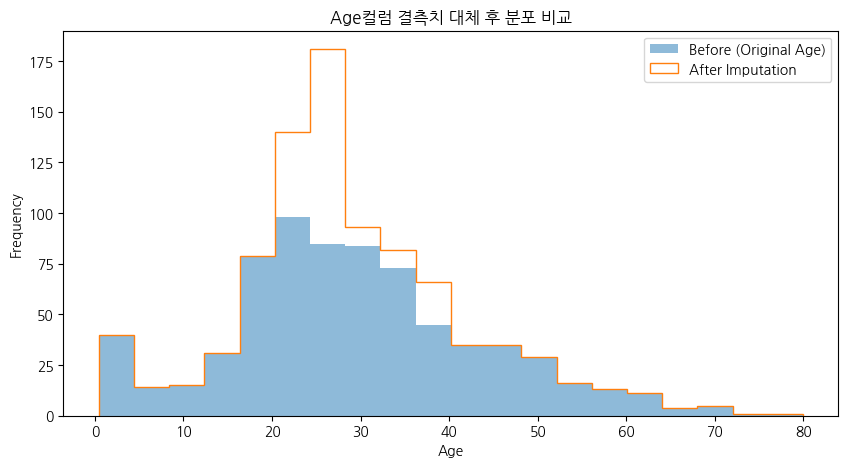

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(dataDF2['Age'], bins=20, alpha=0.5,  label='Before (Original Age)')
plt.hist(dataDF2['Age_imputed'], bins=20, alpha=1.0, histtype='step', label='After Imputation')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age컬럼 결측치 대체 후 분포 비교')
plt.legend()
plt.show()


[4] 분석 진행 <hr>

[5] 도출된 결과 및 인사이트 <hr>